# M2 | Exploration Notebook

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission) adding your SCIPER number in title, example: m2-calcularis-456392.ipynb


## Brief overview of Calcularis
[Calcularis](https://school.alemira.com/de/calcularis/) by Alemira School is a mathematics learning program developed with neuroscientists and computer scientists from ETH Zurich. It promotes the development and interaction of the different areas of the brain that are responsible for processing numbers and quantities and solving mathematical tasks. Calcularis can be used from 1st grade to high school. Children with dyscalculia also benefit in the long term and overcome their arithmetic weakness.


For the guided part of the exploration we will focus on the three main tables:
* ***users***: meta information about users (i.e. total time spent learning with Calcularis, geographic location).
* ***events***: events done by the users in the platform (i.e. playing a game, selecting a new animal in the zoo simulation).
* ***subtasks***: sub-tasks with answer attempts solved by users, primarily in the context of game events.

### Users
* **user_id**: unique identifier of user in database.
* **learning_time_ms**: total learning time in milliseconds per user, totaled over all events. This is calculated by subtracting non-learning time (i.e. if the user is idle for more than one minute).
* **start**: timestamp of initial login.
* **end**: timestamp of last log-off.
* **logged_in_time_ms**: total time between login and log-off, in milliseconds. This will always be larger than learning_time_ms.
* **language**: code for language the user is using Calcularis in (i.e. *fr* for French, *de* for german).
* **country**: code for the country the user is using Calcularis from (i.e. *CH* for Switzerland).

### Events
* **event_id**: unique identifier of event in database.
* **user_id**: user who peformed the event.
* **type**: type of event (task, help, game_start_pause, training_selector, shop, attention_booster, attention_booster_over).
* **mode**: only valid for events of type 'task', representing type of game play (normal, end_of_nr: end of number range, free_training, repetition, favorite, practice).
* **game_name**: name of the game the user is playing. Calcularis has 29 games.
* **learning_time_ms**: total learning time over a single game (event). To see aggregated learning time, examine learning_time_ms in the users table.
* **number_range**: the number range of the exercise (0-10, 0-20, ... 0-1000). The larger the number range, the more difficult the exercise variation.
* **start**: start timestamp of the event.
* **end**: end timestamp of the event.
* **skill_id**: skill number that this game (event) corresponds to.

### Subtasks
*There are many columns in subtasks corresponding to fields present for specific games in Calcularis. More details about corresponding fields for subtasks can be found [here](https://drive.google.com/file/d/1C7bKfHDdKnDzr9-EqWniYoR35ro2QuBd/view?usp=sharing). The fields discussed below are present for the majority of subtasks.*

* **subtask_id**: unique identifier of the subtask in the database.
* **event_id**: unique identifier of event in database.
* **user_id**: user who peformed the event.
* **answer**: the user's answer to the subtask.
* **correct**: `True` if user obtained the correct value in their answer attempt.
* **correctAnswerObject**: the correct answer to the question.
* **hasProperResult**: `True` if this is a question that can be answered by a student. `False` if it corresponds to the SecretNumber game tasks, which consists of counting attempts.
* **range**: number_range for the task (i.e. 0-20 described as R20).
* **subtask_finished_timestamp**: ending timestamp for this subtask (within a specific event).
* **type**: type of subtask event like ConciseEquationTaskDescription, ConciseOrderingTaskDescription (mostly corresponding to individual games, as detailed in the *Subtask Representations* document below).

### Useful Metadata Files
- [Subtask Representations](https://drive.google.com/file/d/1C7bKfHDdKnDzr9-EqWniYoR35ro2QuBd/view?usp=sharing)
- [Number Representations](https://docs.google.com/document/d/1iD60mydGXjB-6HBQakAKI_GGfQaBBQkWcg5eQiAch_A/edit?usp=sharing)
- [Ideas for Calcularis analysis from the Alemira School](https://docs.google.com/document/d/1vM0Gz4f0jStp_wuhBYvnP-VjaBAxzQpVzXomaDfq0D8/edit?usp=sharing)
- [Skill map](https://drive.google.com/file/d/1yJTosk1RV1qzHb-AG_-FLdjlphBsYzoq/view?usp=sharing) representing the relationships between exercises in Calcularis. If you would like to dive deeper into the skill network (programatically), you can use this [.dot file](https://docs.google.com/document/d/1XDPkq7LaAQ3-lAhAvDTLXuiq5u8EKJME/edit?usp=share_link&ouid=104052806655845468726&rtpof=true&sd=true) representing the graph and the corresponding [labels](https://drive.google.com/file/d/1Pkbiz-_bzK80q2l3mkBS_K4wU9sSCY-R/view?usp=sharing).

In [4]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

DATA_DIR = 'data' #You many change the directory

users = pd.read_csv('{}/calcularis_small_users.csv'.format(DATA_DIR), index_col=0)
events = pd.read_csv('{}/calcularis_small_events.csv'.format(DATA_DIR), index_col=0)
subtasks = pd.read_csv('{}/calcularis_small_subtasks.csv'.format(DATA_DIR), index_col=0)

In [5]:
users.head(5)

,learning_time_ms,start,end,logged_in_time_ms,language,country
user_id,,,,,,
1,14032710,2022-11-02T08:37:56.549Z,2023-02-09T11:08:02.599Z,22151340,de,CH
2,16268350,2022-09-07T07:53:38.865Z,2023-02-09T08:39:14.692Z,85421273,nl,NL
3,8012030,2021-09-27T07:45:51.806Z,2022-01-13T12:14:09.565Z,16651482,de,DE
4,1414421,2019-11-12T12:18:15.724Z,2020-10-02T09:20:28.798Z,4561768,de,CH
5,17502108,2022-04-26T11:38:44.114Z,2022-08-29T15:52:11.087Z,25601470,de,CH


In [6]:
events.head(10)

,user_id,mode,game_name,learning_time_ms,number_range,start,end,skill_id,type
event_id,,,,,,,,,
0,1,NORMAL,Subitizing,8835.0,R10,2022-11-02T08:39:12.355Z,2022-11-02T08:39:25.130Z,1.0,task
1,1,NORMAL,Conversion,21167.0,R10,2022-11-11T10:26:27.893Z,2022-11-11T10:26:49.260Z,4.0,task
2,1,NORMAL,Conversion,11182.0,R10,2022-11-18T10:34:01.044Z,2022-11-18T10:34:12.423Z,7.0,task
3,1,NORMAL,Landing,6823.0,R10,2022-11-25T10:32:43.428Z,2022-11-25T10:32:56.986Z,19.0,task
4,1,END_OF_NR,Conversion,9107.0,R10,2022-12-02T10:44:40.555Z,2022-12-02T10:44:49.874Z,7.0,task
5,1,END_OF_NR,Conversion,10703.0,R10,2022-12-09T10:12:16.068Z,2022-12-09T10:12:26.984Z,4.0,task
6,1,NORMAL,Comparison,1383.0,R20,2022-12-16T10:25:42.441Z,2022-12-16T10:25:45.508Z,33.0,task
7,1,END_OF_NR,Landing,6052.0,R20,2023-01-20T10:13:41.496Z,2023-01-20T10:13:49.096Z,50.0,task
8,1,END_OF_NR,Landing,6055.0,R20,2023-01-27T10:18:17.427Z,2023-01-27T10:18:26.356Z,49.0,task


In [7]:
subtasks.head(10)

,event_id,user_id,aim,answer,answerMode,availableNumbers,correct,correctAnswerObject,correctNumber,destination,...,startPosition,subtask_finished_timestamp,target,timeoutInSeconds,timeoutInSteps,type,upperBound,divisor,orderIndependent,step
subtask_id,,,,,,,,,,,,,,,,,,,,,
0,0,1,NaN,4,NaN,NaN,True,4,4.0,NaN,...,NaN,2022-11-02T08:39:24.930Z,NaN,NaN,NaN,ConciseSubitizingTaskDescription,NaN,NaN,NaN,NaN
1,0,1,NaN,1,NaN,NaN,True,NaN,NaN,NaN,...,NaN,2022-11-02T08:39:24.930Z,NaN,0.0,2.0,ConciseTimeoutDescription,NaN,NaN,NaN,NaN
2,1,1,NaN,3,NaN,NaN,True,3,NaN,ARABIC,...,NaN,2022-11-11T10:26:49.007Z,NaN,NaN,NaN,ConciseConversionTaskDescription,NaN,NaN,NaN,NaN
3,2,1,NaN,5,NaN,NaN,True,5,NaN,EXPLODED_BEAM,...,NaN,2022-11-18T10:34:12.191Z,NaN,NaN,NaN,ConciseConversionTaskDescription,NaN,NaN,NaN,NaN
4,3,1,3.0,"{'a': 2, 'b': 2.0402703}",NaN,NaN,False,"{'a': 3, 'b': 3.0}",NaN,NaN,...,0.5,2022-11-25T10:32:56.805Z,NaN,NaN,NaN,ConciseLandingTaskDescription,3.5,NaN,NaN,NaN
5,4,1,NaN,9,NaN,NaN,True,9,NaN,EXPLODED_BEAM,...,NaN,2022-12-02T10:44:49.621Z,NaN,NaN,NaN,ConciseConversionTaskDescription,NaN,NaN,NaN,NaN
6,5,1,NaN,7,NaN,NaN,False,9,NaN,ARABIC,...,NaN,2022-12-09T10:12:26.729Z,NaN,NaN,NaN,ConciseConversionTaskDescription,NaN,NaN,NaN,NaN
7,6,1,NaN,16,NaN,NaN,True,16,NaN,NaN,...,NaN,2022-12-16T10:25:45.293Z,NaN,NaN,NaN,ConciseSetComparisonTaskDescription,NaN,NaN,NaN,NaN
8,6,1,NaN,1.3659,NaN,NaN,True,NaN,NaN,NaN,...,NaN,2022-12-16T10:25:45.293Z,NaN,4.0,0.0,ConciseTimeoutDescription,NaN,NaN,NaN,NaN


## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

## Handling missing values

In [8]:
users['country'] = users['country'].fillna('unknown')
users['language'] = users['language'].fillna('unknown')

#### a) How many distinct participants do we have in the data set?


In [9]:
print('In the dataset there are', len(users), 'distinct participants')

In the dataset there are 1000 distinct participants


#### b) How many games were played per user? Please provide a visualization and discuss the distribution.

In [10]:
print('In average, each user played', events.groupby(['user_id']).size().mean(), 'games')

In average, each user played 36.81857451403888 games


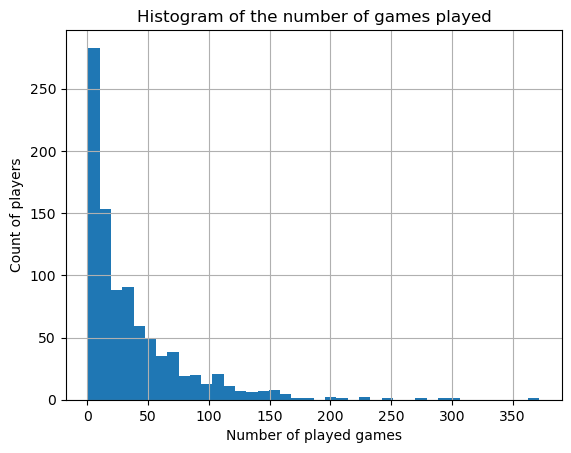

In [11]:
events.groupby(['user_id']).size().hist(bins = 40)
plt.title('Histogram of the number of games played')
plt.xlabel('Number of played games')
plt.ylabel('Count of players')
plt.show()

The histogram of the number of games played looks like a poisson distribution and this is consistent with the fact that this metric contains discrete values: the number of games played by each user.

#### c) What are the 10 most popular games played (events)? Please provide visualizations of the frequency of the top 10 games.

Hint: See `game_name` in table `events`.

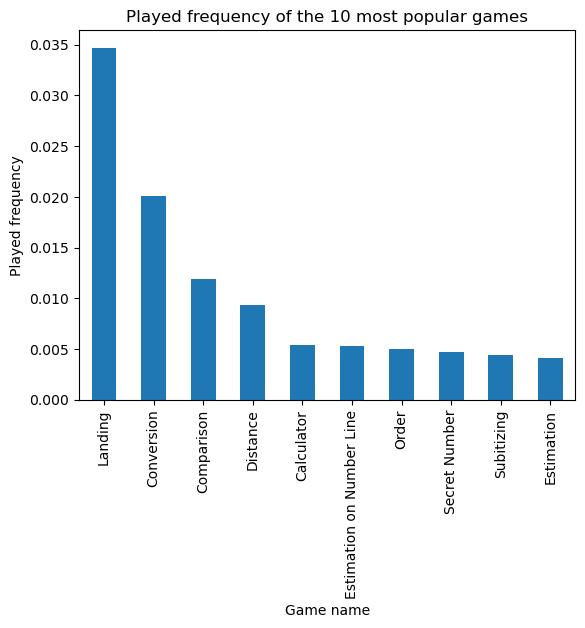

In [12]:
most_played_games_count = events.groupby(['game_name']).size().nlargest(10)
total_played_games = events[events.type == 'task'].size
most_played_games_freq = most_played_games_count/total_played_games

most_played_games_freq.plot.bar()
plt.title('Played frequency of the 10 most popular games')
plt.xlabel('Game name')
plt.ylabel('Played frequency')
plt.show()

The 10 most played games represent almost all the games that were played. We notice that the first games that are proposed by Calcularis to start learning are also the most played (landing, comparison, conversion), this may indicate that the majority of users give up the training before reaching the end of the topics proposed by the platform.

## Task 2: Static Analysis

In this second task, you will do a univariate an multivariate exploration of some aggregated features.

#### a) Build a data frame containing one row per user:

``[user_id, ui_locale, num_events, num_games, percentage_correct, total_not_learning_time_ms]``


The features are defined as follows:

- **ui_locale**: geographic region the student is from

- **num_events**: total number of events of the student  

- **num_games**: total number of unique games played by the student

- **percentage_correct**: number of correct answers/total number of answers (hint: see `correct` in subtask table).

- **total_not_learning_time_ms**: total amount of ms not spent actively learning

In [13]:
features_name = ['ui_locale', 'num_events', 'num_games', 'percentage_correct', 'total_not_learning_time_ms']
users_features = pd.concat([users.country, events.groupby(['user_id']).size(), 
                            events.groupby(['user_id']).game_name.nunique(), 
                            subtasks.groupby(['user_id']).correct.sum()/subtasks.groupby(['user_id']).size()*100,
                            users.logged_in_time_ms - users.learning_time_ms], axis=1, keys=features_name, join = 'inner')

In [14]:
users_features

,ui_locale,num_events,num_games,percentage_correct,total_not_learning_time_ms
user_id,,,,,
1,CH,12,6,78.571429,8118630
2,NL,56,7,68.115942,69152923
3,DE,10,4,66.666667,8639452
4,CH,2,2,66.666667,3147347
5,CH,14,7,76.470588,8099362
...,...,...,...,...,...
995,unknown,8,5,76.923077,2339649
996,CH,6,3,63.636364,2866018
997,DE,12,7,89.473684,3265984


b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (`ui_locale, num_events, num_games, percentage_correct, total_not_learning_time_ms`) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def get_feature_stats(df):
    """
    Obtains descriptive statistics for all features and percentage of missing 
    values
    
    Parameters
    ----------
    df : DataFrame
         Containing all data

    Returns
    -------
    stats : DataFrame
            Containing the statistics for all features.
                   
    """
    stats = df.describe(include= 'all')
    
    # Select the desired statistics
    stats.loc['perc_missing_val'] = df.isnull().sum(axis=0)*100 / len(df)
    return stats

In [16]:
get_feature_stats(users_features)

,ui_locale,num_events,num_games,percentage_correct,total_not_learning_time_ms
count,926,926.00,926.00,926.00,926.00
unique,14,NaN,NaN,NaN,NaN
top,CH,NaN,NaN,NaN,NaN
freq,402,NaN,NaN,NaN,NaN
mean,NaN,36.82,7.58,75.12,26578788.97
std,NaN,42.99,4.33,18.10,53251452.63
min,NaN,1.00,1.00,0.00,36099.00
25%,NaN,8.00,4.00,67.08,4325120.75
50%,NaN,22.00,8.00,79.13,12194650.00
75%,NaN,51.00,10.00,85.96,29650469.00


In [17]:
#Handling the obvious outlier in the column total_not_learning_time_ms
users_features.loc[users_features.total_not_learning_time_ms > 1e9, 'total_not_learning_time_ms'] = users_features.total_not_learning_time_ms.median()
users_features.total_not_learning_time_ms.max()

378061839

In [18]:
def plot_features(df):
    """
    Plots all features individually in the same figure
    
    Parameters
    ----------
    df : DataFrame
         Containing all data
    """ 
    df = df.copy()
    
    continuous_cols = list(df._get_numeric_data().columns)
    categorical_cols = list(set(df.columns) - set(continuous_cols))
    fig, axes = plt.subplots(df.shape[1], 2, figsize=(10,4*df.shape[1]))
    for i, col in enumerate(df.columns):
        ax1 = axes[(2*i) // 2, (2*i) % 2]
        ax2 = axes[(2*i+1) // 2, (2*i+1) % 2]
        data = df[~df[col].isna()]
        if col in continuous_cols:
            sns.histplot(data=data[col], bins=50, ax=ax1, kde=True)
            ax1.set_title('Histogram of the ' + col)
            sns.boxplot(x=data[col], ax=ax2)
            ax2.set_title('Boxplot of the ' + col)
        elif col in categorical_cols:
            chart = sns.countplot(data=data, x=col, ax=ax1, order = data[col].value_counts().index)
            chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right', fontsize = 8)
            ax1.set_title('Histogram of the ' + col)

            val_counts = data[col].value_counts()/np.sum(data[col].value_counts())
            labels = val_counts.index.to_list()
            
            wedges, texts, autotexts = ax2.pie(val_counts, labels = labels, autopct='%1.1f%%')
            threshold = 3
            for label, pct_label in zip(texts, autotexts):
                pct_value = pct_label.get_text().rstrip('%')
                if float(pct_value) < threshold:
                    label.set_text('')
                    pct_label.set_text('')
            ax2.legend(bbox_to_anchor=(1.05, 1), fontsize = 8)
            ax2.set_title('Pie chart of the ' + col)
        else:
            print(col)
    fig.tight_layout()    
    plt.show()
    return plt
    

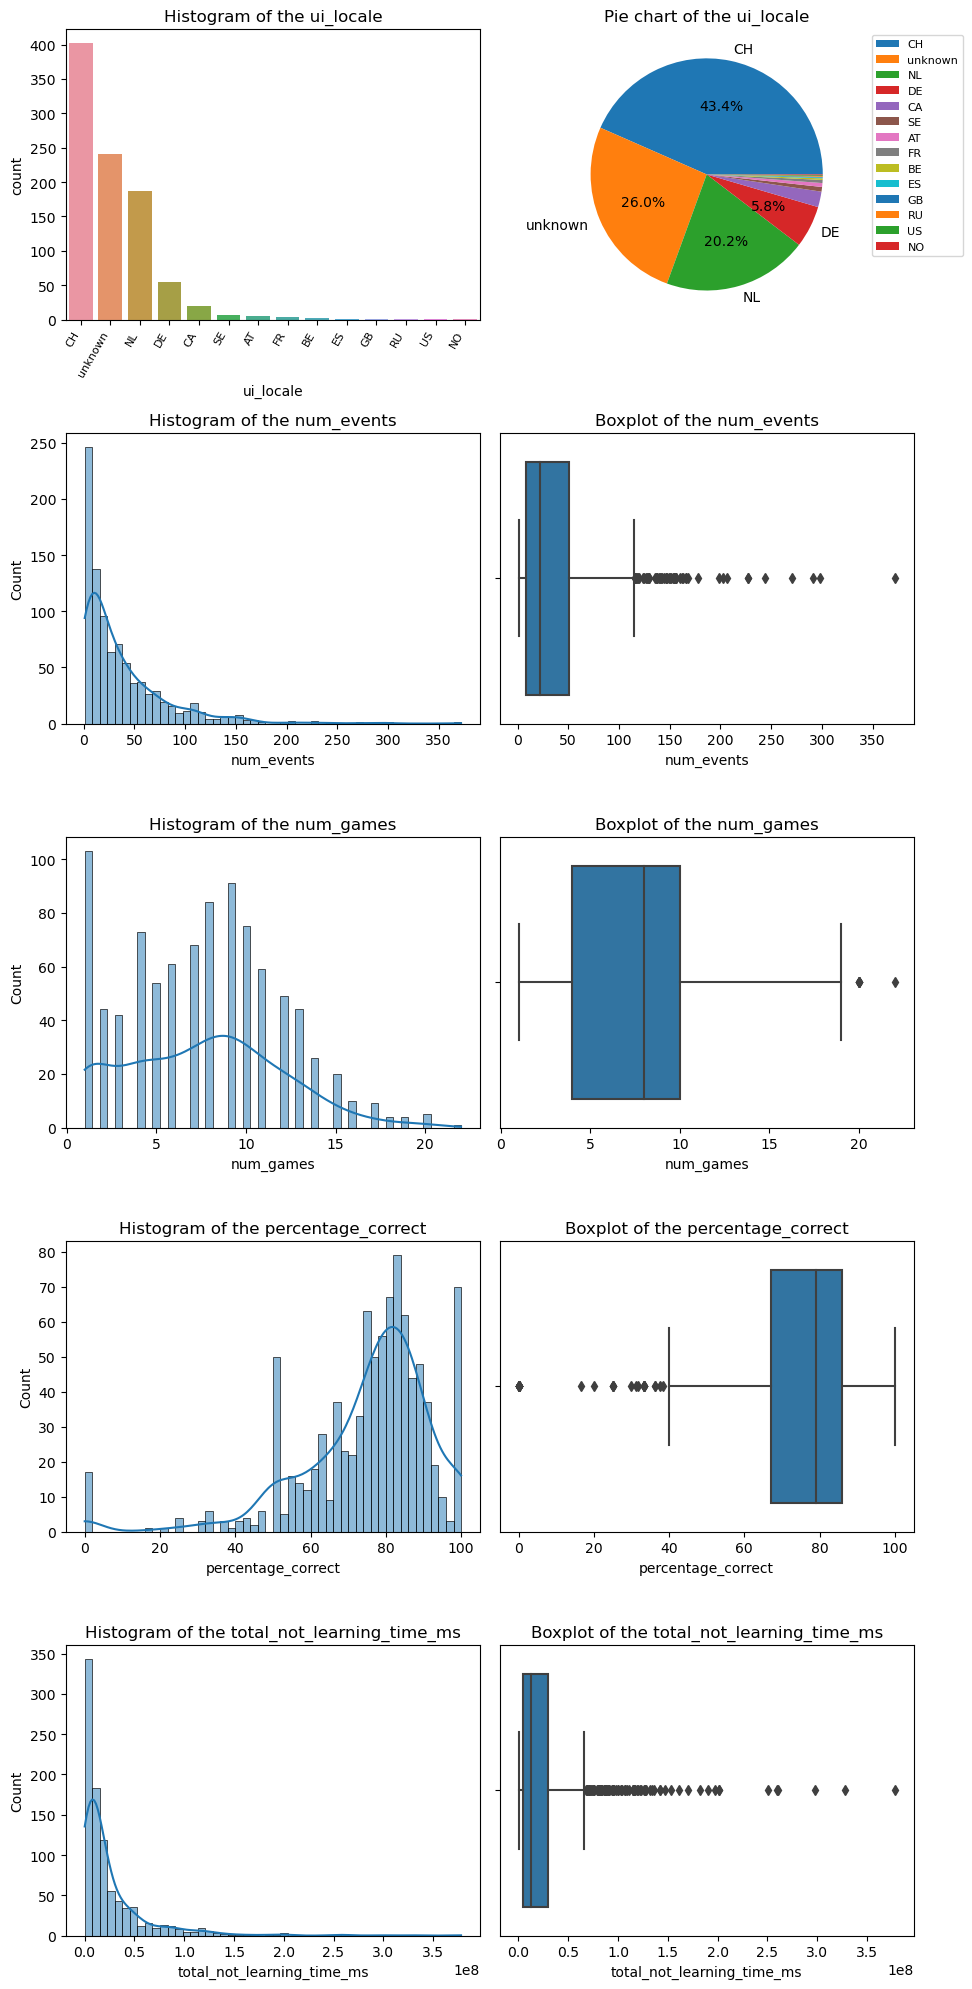

<module 'matplotlib.pyplot' from '/Users/emmaboehly/programmation/anaconda3/envs/MLBD/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [19]:
plot_features(users_features)

We can see that almost half of the users come from Switzerland but we can also notice that a quarter of the users did not indicate from which country they came, so they were classified as "unknown". The number of events shows a poisson distribution (with a relatively small alpha) which is consistent with the fact that it is a discrete metric that counts the number of games played. The number of unique games played by the students, which is also a discrete metric, also presents a histogram similar to a poisson distribution, however we can note a high peak at num_games = 1 which does not fit with the distribution, one might assume that this peak comes from the fact that a part of the users are just testing the platform without going further in the training. 
For the percentage of correct answers, we would expect a Bernoulli distribution since this metric represents the chances to answer a question correctly. In this case, the distribution we obtain corresponds rather to a binomial distribution skewed to the left.
Finally, the histogram of the time during which each user did not train matches a poisson distribution, in fact we can see this metric as the count of the number of milliseconds not worked by the students. Moreover, we observe that this metric contains an obvious outlier at 1.2*10^9 ms, so we removed it from the data.

c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

In [20]:
events['duration'] = pd.to_datetime(events[events.type == 'task']['end']) - pd.to_datetime(events[events.type == 'task']['start'])
new_features = pd.DataFrame({'mean_game_duration_s' : events.groupby(['user_id']).duration.mean().dt.total_seconds()})

event_features = events[events.type == 'task'][['user_id', 'game_name']]
event_features['perc_correct'] = subtasks.groupby(['event_id']).correct.sum()/subtasks.groupby(['event_id']).size()*100
#worst_game = game_perc.loc[game_perc.groupby("user_id")["perc_correct"].idxmin()]
new_features['hardest_game'] = event_features.groupby(['user_id', 'game_name']).mean().groupby('user_id')['perc_correct'].idxmin().str[1]

ValueError: time data "2018-09-24T09:33:27Z" doesn't match format "%Y-%m-%dT%H:%M:%S.%f%z", at position 1357. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
new_features.head(10)

,mean_game_duration_s,hardest_game
user_id,,
1,11.65,Distance
2,38.55,Order
3,9.35,Landing
4,322.41,Subitizing
5,16.17,Landing
6,12.05,Subitizing
7,22.97,Distance
8,19.81,Landing
9,22.78,Comparison


As additional features I chose to calculate the average time each student spends per game. This metric seems to be interesting because it can be used as a measure of the students' level. Indeed, one can assume that a slower student will tend to have more difficulties than a student who finishes the games quickly. Since this metric is an average, I would expect to get a normal distribution.
The other metric I decided to extract is which game was the most difficult to complete for each user. Specifically, for each user I looked for the game with the lowest percentage of correct answers. I found this metric useful because it shows which types of exercises and skills are difficult to master and should be focused on to improve student learning. In this case, one can imagine that the least well performed games are those where the skills to be mastered are the most advanced, i.e. multiplication and division.

d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

In [ ]:
get_feature_stats(new_features)

,mean_game_duration_s,hardest_game
count,926.00,926
unique,NaN,25
top,NaN,Landing
freq,NaN,219
mean,36.29,NaN
std,144.09,NaN
min,3.64,NaN
25%,18.57,NaN
50%,25.55,NaN
75%,35.79,NaN


In [ ]:
# Handling obvious outlier in the new features
new_features.loc[new_features.mean_game_duration_s > 360, 'mean_game_duration_s'] = new_features.mean_game_duration_s.median()
new_features['mean_game_duration_s'].max()

322.4055

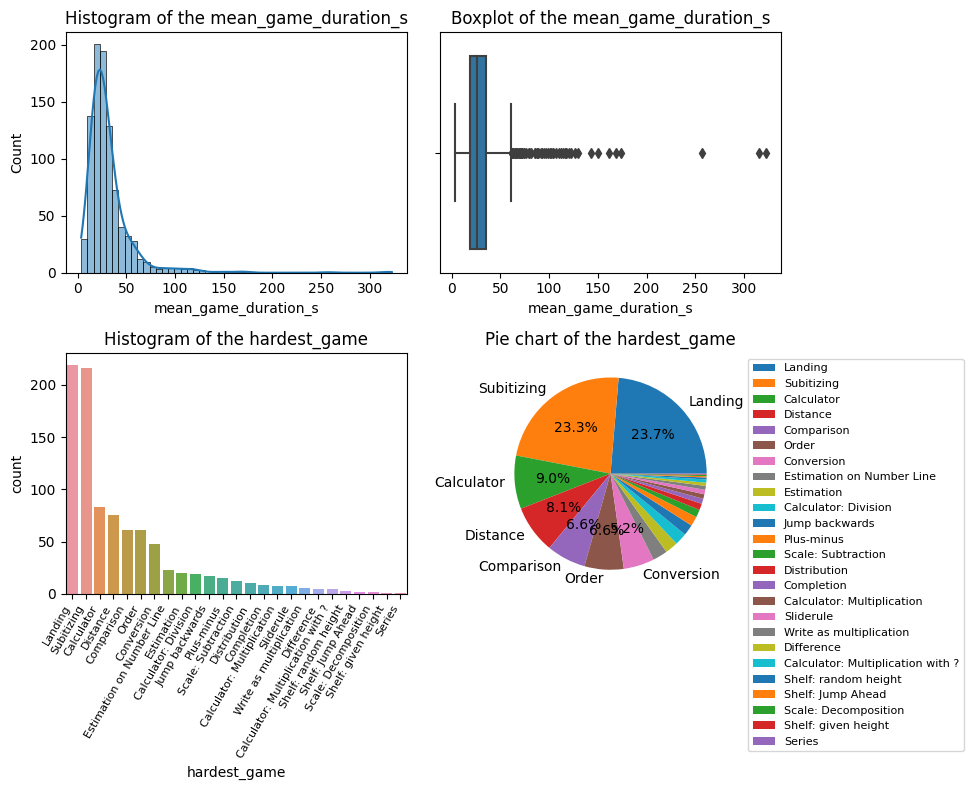

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

In [ ]:
plot_features(new_features)

For the mean time per game one first notices the presence of an obvious outlier at 4245s that has been removed from the dataset. We can then see that the histogram we obtain looks like a normal distribution but skewed to the right. This bias can be the result of some students doing something else while training which increases the duration of the game without this extra time being part of their reflection time.
For the hardest games, my initial hypothesis turns out to be wrong. Indeed, the least well performed games are those that I would have considered as the easiest, in particular those on number processing, whereas divisions come only afterwards and games on multiplications are actually at the end of the ranking. We can put these results in relation with the playing frequency of each game. Indeed, we have seen that the most played games are also those which are played at the beginning of the training and are therefore also the easiest: most of the students do not reach the most advanced exercises. Thus the games on multiplication and division being only rarely played, they also appear less often as the "hardest game" of the users. 

e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

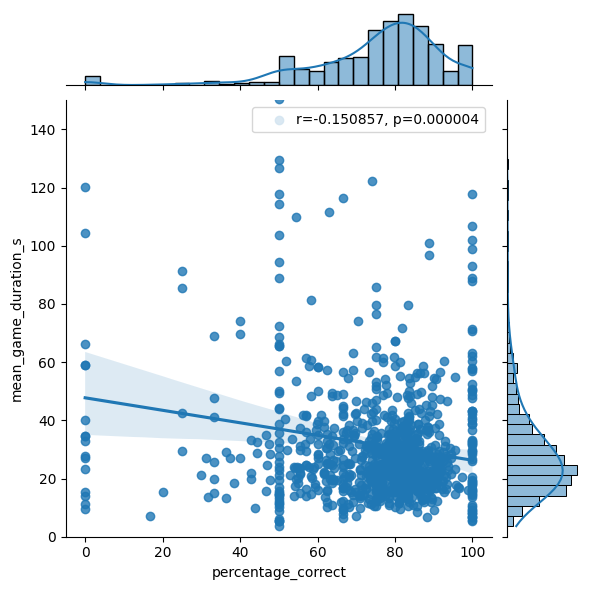

In [ ]:
dataset = pd.concat([users_features, new_features], axis = 1)
plot = sns.jointplot(data = dataset, y = 'mean_game_duration_s', x = 'percentage_correct', kind='reg', ylim = [0,150])
r, p = stats.pearsonr(dataset['percentage_correct'], dataset['mean_game_duration_s'])
phantom, = plot.ax_joint.plot([], [], linestyle="", alpha=0)
plot.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.show()

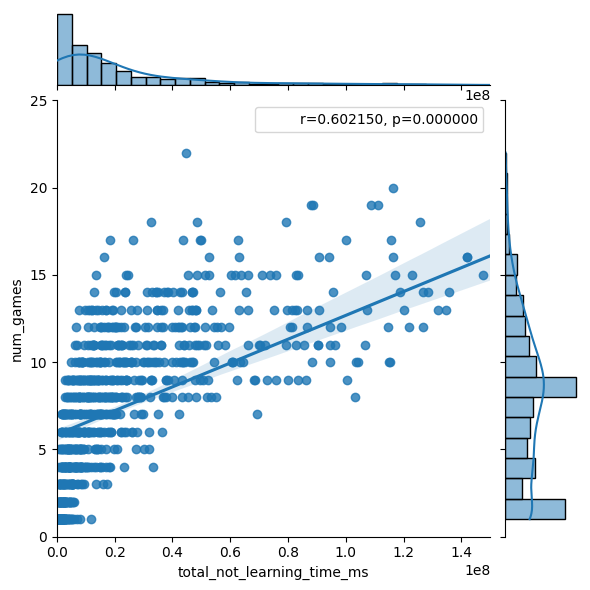

In [ ]:
plot = sns.jointplot(data = dataset, y='num_games', x='total_not_learning_time_ms', kind='reg', xlim=[0, 1.5e8], ylim = [0,25])
r, p = stats.pearsonr(dataset['total_not_learning_time_ms'], dataset['num_games'])
phantom, = plot.ax_joint.plot([], [], linestyle="", alpha=0)
plot.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.show()

For the 1st pair of features, I selected the mean duration of the games played by each user in combination with the percentage of correct answers. The hypothesis was that a student's progress in mathematics results in a higher proportion of correct answers but also in a greater ease in completing the games. Thus, one would expect the mean duration of the games to decrease when the percentage of correct answers increases. As it happens, the plot for this pair of features does not seem to show a significant correlation. Moreover, although the linear correlation curve is decreasing, the pearson coefficient (r) that we calculated indicates a linear correlation of only -0.15, which is rather low. There must be a lot of noise in our data which does not allow us to obtain conclusive results.

As a second pair of features I decided to take the number of individual games played by each user in combination with the time spent not learning. My hypothesis was that the more time a student spent on the platform, and thus the more they tested the different games available, the more time they would also spend in the shop playing with the animals or in the tab evaluating their progress. So I expected that when the number of unique games played increased, the time spent not learning would also increase. As it happens, we can see on the plot that there seems to be a relationship between these 2 features and this is confirmed by the pearson coefficient r = 0.60 which indicates that there is a relatively strong positive linear correlation between the features (at least much more than for our first pair). Our hypothesis thus seems to be confirmed by the data.

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_events, num_questions, percentage_correct, num_shop]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered **per week**.

- **num_events**: total number of events of the student per week.

- **percentage_correct**: number of correct answers/total number of answers  **per week** (hint: answer = correct). If desired, you may assign a weight of 0.5 to partially correct answers.

- **num_shop**: total number of shop events **per week** (where the student wins animals for their zoo with rewards from the games).

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the subtasks table.

Hint: You may extract the week of the year (dt.week) from the timestamps. 

You can limit the number of weeks to 13, i.e. for each user we just look at the first 13 weeks of data.
Yoy may change and justify your choice for the number of weeks.

In [ ]:
events['start'] = pd.to_datetime(events['start'])
events_features = pd.DataFrame({'weeks' : events.groupby('user_id').start.apply(lambda x: x - x.iloc[0]).dt.days//7,
                                'user_id' : events.user_id,
                                'num_questions' : subtasks.groupby('event_id').size(),
                                'correct_answer' : subtasks.groupby('event_id').correct.sum(),
                                'is_shop' : events['type'] == 'SHOP',
                                'game_name' : events.game_name})
time_series = pd.DataFrame({'num_questions' : events_features.groupby(['user_id', 'weeks']).num_questions.sum(),
                            'num_events' : events_features.groupby(['user_id', 'weeks']).size(),
                            'percentage_correct' : 100*events_features.groupby(['user_id', 'weeks']).correct_answer.sum()/events_features.groupby(['user_id', 'weeks']).num_questions.sum(),
                            'num_shop' : events_features.groupby(['user_id', 'weeks']).is_shop.sum()})

time_series = time_series[time_series.index.get_level_values('weeks') <= 27]

In [ ]:
subtasks.where(subtasks.event_id 
subtasks.groupby('event_id')

subtasks[subtasks.event_id].groupby('event_id').correct.sum(),
events.skill == "Number representation"

event.where(event.skill == "Number representation")


In [ ]:
time_series

num_questions  num_events  percentage_correct  num_shop
user_id weeks                                                         
1       0               2.00           1              100.00         0
        1               1.00           1              100.00         0
        2               1.00           1              100.00         0
        3               1.00           1                0.00         0
        4               1.00           1              100.00         0
...                      ...         ...                 ...       ...
998     15              1.00           1              100.00         0
        20              1.00           1              100.00         0
1000    0               2.00           1               50.00         0
        15              1.00           1              100.00         0
        21              1.00           1              100.00         0

[8779 rows x 4 columns]

#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

Hypotheses :
- Over the weeks of training, one can expect that the number of events launched by users will decrease. Indeed, one can imagine that when they begin the training, students are very motivated and play a lot, then as time goes by they eventually lose part of their motivation, which results in a decrease of the number of events
- As the weeks of training go by, one can expect that the percentage of correct answers will increase. Indeed, as the students progress and learn from the platform, they become better and the proportion of their answers being correct increases. 

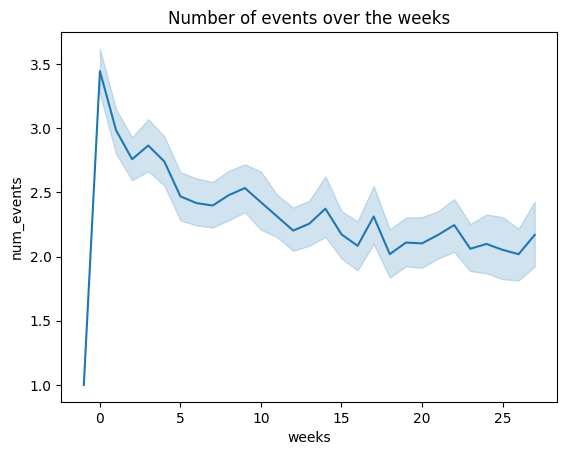

In [ ]:
sns.lineplot(time_series, x ='weeks', y = 'num_events')
plt.title('Number of events over the weeks')
plt.show()

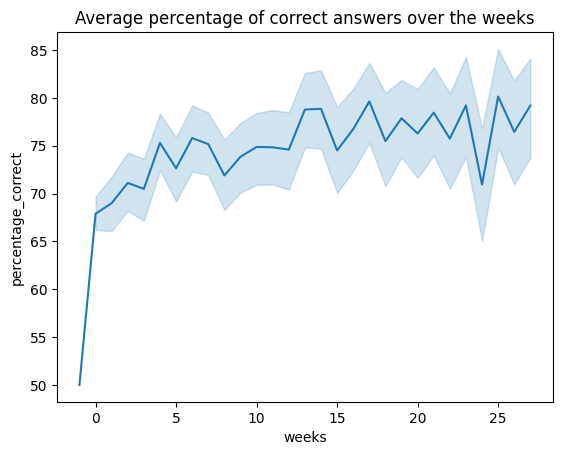

In [ ]:
sns.lineplot(time_series, x ='weeks', y = 'percentage_correct')
plt.title('Average percentage of correct answers over the weeks')
plt.show()

We find, as expected in the hypotheses, that the number of events per week decreases and the percentage of correct responses increases. In particular, we can see that the decrease in the number of events is more pronounced in the first weeks (especially until week 13) and that afterwards this metric tends to stabilize. Indeed, the loss of motivation of the students usually happens quite quickly at the beginning of the training and after a while we can imagine that the time spent on the platform stabilizes.
Note that we have kept the first 27 weeks of the users as it allowed us to observe the stabilization phase.
Regarding the percentage of correct answers, we also notice that the metric increases more significantly in the first weeks of training and then more slowly later on. We can imagine that it is simple to progress quickly on the easiest exercises (which are the first ones done by the students) and that as the weeks go by, the exercises become more complicated and that the progression is slower.

# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and provide a visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses?



In [ ]:
most_played = events_features.groupby(['user_id', 'weeks', 'game_name']).size().groupby(['user_id', 'weeks']).idxmax().str[2]
most_played.where((most_played != 'Subitizing') &
                  (most_played != 'Conversion') &
                  (most_played != 'Estimation on Number Line') &
                  (most_played != 'Estimation') &
                  (most_played != 'Scale: Conversion') &
                  (most_played != 'Landing'), 'Number representation', inplace = True)
most_played.where((most_played != 'Comparison') &
                  (most_played != 'Secret Number') &
                  (most_played != 'Distance') &
                  (most_played != 'Scale: Composition') &
                  (most_played != 'Order'), 'Number comparison/manipulation', inplace = True)
most_played.where((most_played != 'Scale: Decomposition') &
                  (most_played != 'Scale: Subtraction') &
                  (most_played != 'Scale: Subtraction by Tens and Ones') &
                  (most_played != 'Sliderule') &
                  (most_played != 'Plus-minus') &
                  (most_played != 'Difference') &
                  (most_played != 'Completion') &
                  (most_played != 'Calculator'), 'Addition/Substraction', inplace = True)
most_played.where((most_played != 'Write as multiplication') &
                  (most_played != 'Shelf: Jump Ahead') &
                  (most_played != 'Shelf: given height') &
                  (most_played != 'Shelf: random height') &
                  (most_played != 'Distribution') &
                  (most_played != 'Calculator: Multiplication') &
                  (most_played != 'Calculator: Multiplication with ?') &
                  (most_played != 'Calculator: Division') &
                  (most_played != 'Jump backwards') &
                  (most_played != 'Series'), 'Multiplication/Division', inplace = True)
time_series['most_played'] = most_played

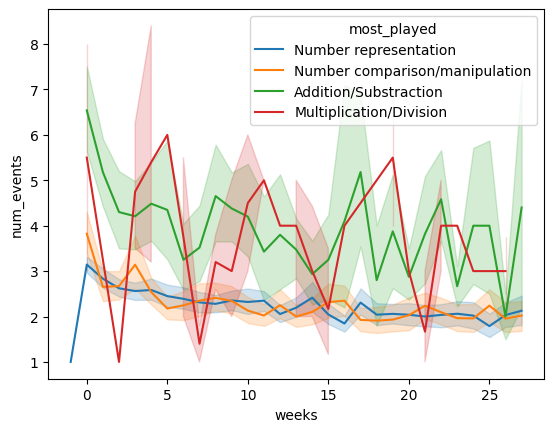

In [ ]:
sns.lineplot(time_series, x ='weeks', y = 'num_events', hue = 'most_played')
plt.show()

Since in task 2.d) my hypothesis about the hardest games (based on the percentage of correct answers) was not confirmed and since I assumed that this was because students who were just starting to learn did not play many of the games considered hard (especially multiplication and division), I thought it would be interesting to check this point. In particular, I extracted from the data the most played game by each user for each week and I divided the games in 4 categories: Number representation, Number comparison/manipulation, Addition/Substraction, Multiplication/Division (classified according to their order of difficulty in my opinion). I then plotted the evolution of the number of games played according to the weeks and separated the curves according to the most played game. I expected that the hardest games would be played only at the end of the training and thus that the curve of the hardest games would be above the easier ones. As it happens, this is close to what we get on the graphs. We can notice that among the 4 classes I extracted 2 pairs stand out with similar behaviors: Number representation and Number comparison/manipulation are both very close throughout the weeks and their variability is relatively low. Addition/Substraction and Multiplication/Division are also very close and show a much higher variability over the weeks.
Moreover, our hypothesis seems to be correct in the sense that the hardest games (Addition/Substraction and Multiplication/Division) are indeed above the simplest games (Number representation and Number comparison/manipulation).